EDA.

Vamos a comenzar el proceso de EDA en los archivos 'homicidios' y después 'lesiones'. 
La idea de esta parte del proyecto es comprender de mejor manera de los datos que disponemos antes de comenzar el dashboard.

Comenzamos importando las bibliotecas pertinentes.

In [169]:
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import nltk
import openpyxl
from wordcloud import WordCloud

Importamos archivos.

In [170]:
df = pd.read_excel('homicidios.xlsx')

Revisamos la información.

In [171]:
df.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


Comenzamos el EDA en el archivo 'homicidios' consultando su información general.

In [172]:
print(df.head())
print(df.info())
print(df.describe())

          ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA HH  \
0  2016-0001           1 2016-01-01  2016   1   1  04:00:00  4   
1  2016-0002           1 2016-01-02  2016   1   2  01:15:00  1   
2  2016-0003           1 2016-01-03  2016   1   3  07:00:00  7   
3  2016-0004           1 2016-01-10  2016   1  10  00:00:00  0   
4  2016-0005           1 2016-01-21  2016   1  21  05:20:00  5   

                             LUGAR_DEL_HECHO TIPO_DE_CALLE  ...  Altura  \
0  AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ       AVENIDA  ...     NaN   
1          AV GRAL PAZ  Y AV DE LOS CORRALES      GRAL PAZ  ...     NaN   
2                         AV ENTRE RIOS 2034       AVENIDA  ...  2034.0   
3      AV LARRAZABAL Y GRAL VILLEGAS CONRADO       AVENIDA  ...     NaN   
4  AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA        AVENIDA  ...     NaN   

                                 Cruce  \
0  FERNANDEZ DE LA CRUZ, F., GRAL. AV.   
1                  DE LOS CORRALES AV.   
2                         

In [173]:
print(df.dtypes)

ID                               object
N_VICTIMAS                        int64
FECHA                    datetime64[ns]
AAAA                              int64
MM                                int64
DD                                int64
HORA                             object
HH                               object
LUGAR_DEL_HECHO                  object
TIPO_DE_CALLE                    object
Calle                            object
Altura                          float64
Cruce                            object
Dirección Normalizada            object
COMUNA                            int64
XY (CABA)                        object
pos x                            object
pos y                            object
PARTICIPANTES                    object
VICTIMA                          object
ACUSADO                          object
dtype: object


Checamos la cantidad de valores nulos que presenta el dataset.

In [174]:
valores_faltantes = df.isnull().sum()
porcentajes_valores_faltantes = (valores_faltantes / len(df)) * 100

valores_faltantes_df = pd.DataFrame({
    'Cantidad de valores faltantes': valores_faltantes,
    'Porcentaje de valores faltantes': porcentajes_valores_faltantes})
valores_faltantes_df
#QUE HACEMOS CON LOS VALORES FALTANTES? ELIMINAMOS? O DEJAMOS ASÍ? COMENZAMOS UN ETL?

,Cantidad de valores faltantes,Porcentaje de valores faltantes
ID,0,0.000000
N_VICTIMAS,0,0.000000
FECHA,0,0.000000
AAAA,0,0.000000
MM,0,0.000000
DD,0,0.000000
HORA,0,0.000000
HH,0,0.000000
LUGAR_DEL_HECHO,0,0.000000
TIPO_DE_CALLE,0,0.000000


Revisamos la existencia de duplicados.

In [175]:
print(df.duplicated().sum())      

0


In [176]:
df.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

No contamos con valores duplicados.

Comenzando con gráficos con info cuantitativa, creamos un gráfico que nos dice cuantas víctimas tenemos por año.

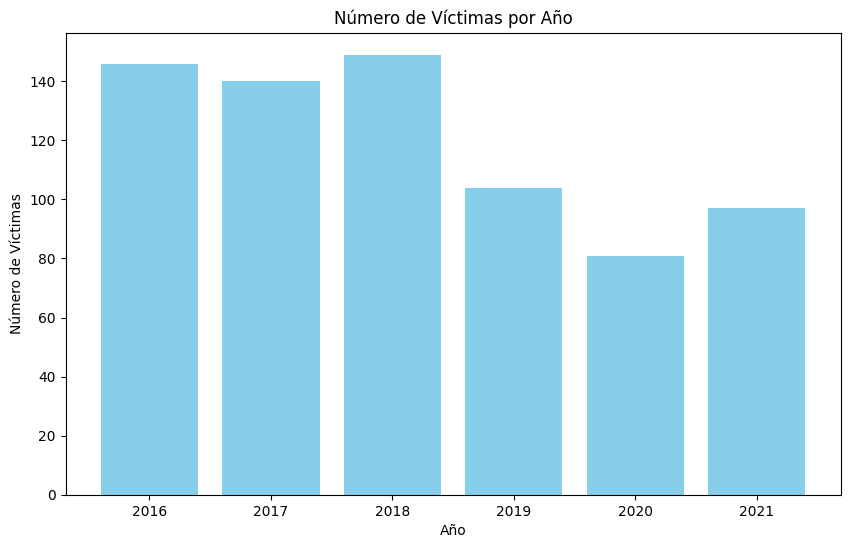

In [177]:
victimas_por_año = df.groupby('AAAA')['N_VICTIMAS'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(victimas_por_año['AAAA'], victimas_por_año['N_VICTIMAS'], color='SKyblue')
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')
plt.title('Número de Víctimas por Año')
plt.show()


Podemos notar que los homicidios fueron mayores en los años 2016, 2017 y 2018. La menor fue 2020.

In [178]:

cantidad_calles_distintas = df['N_VICTIMAS'].count()

print(f"La cantidad de total de victimas es: {cantidad_calles_distintas}")

La cantidad de total de victimas es: 696


Revisamos también cuantas de estas victimas por vehiculo hemos tenido.

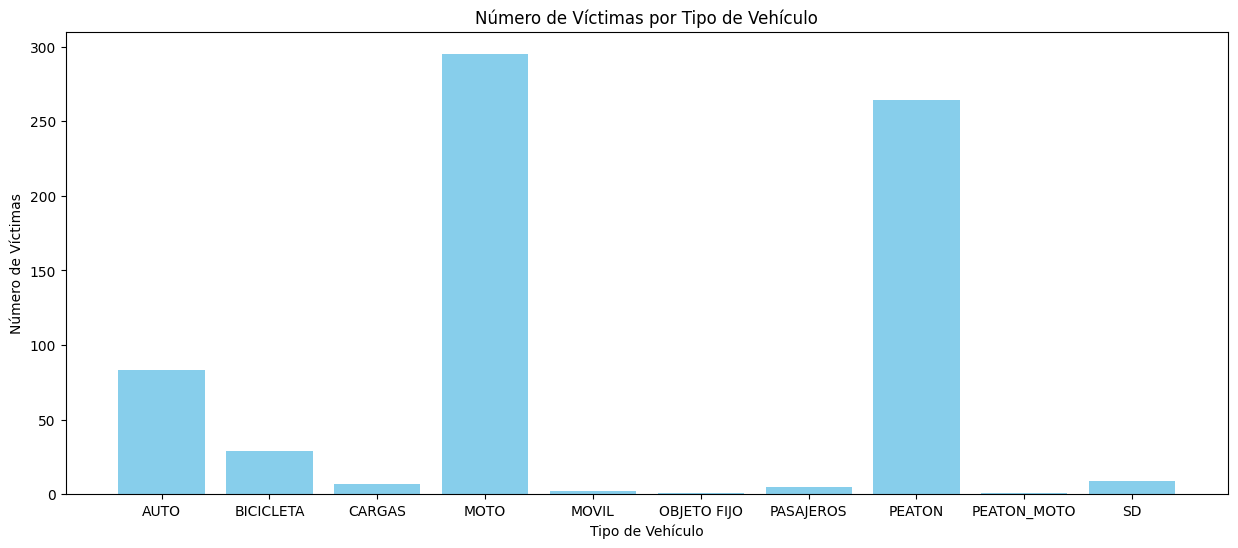

In [179]:
victimas_por_vehiculo = df.groupby('VICTIMA')['N_VICTIMAS'].count().reset_index()


plt.figure(figsize=(15, 6))
plt.bar(victimas_por_vehiculo['VICTIMA'], victimas_por_vehiculo['N_VICTIMAS'], color='SKyblue')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Número de Víctimas')
plt.title('Número de Víctimas por Tipo de Vehículo')
plt.show()

Consultamos cuantas victimas fueron en la categoría de 'MOTO'.

In [180]:
conteo_moto = df['VICTIMA'].str.contains('MOTO').sum()
print(conteo_moto)

296


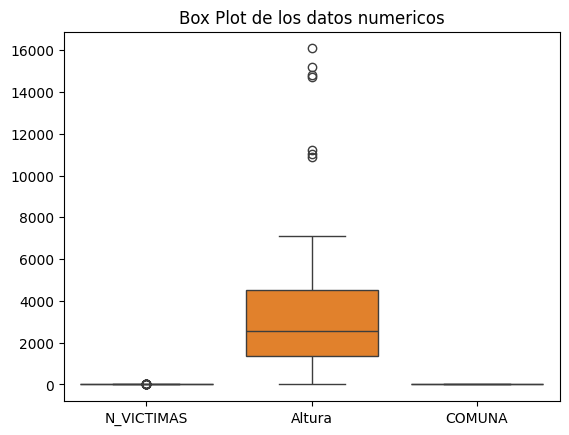

In [181]:
sns.boxplot(data=df[['N_VICTIMAS', 'HH', 'Altura', 'COMUNA']])
plt.title('Box Plot de los datos numericos')
plt.show()

Podemos notar algunos outliers en el apartado de altura.

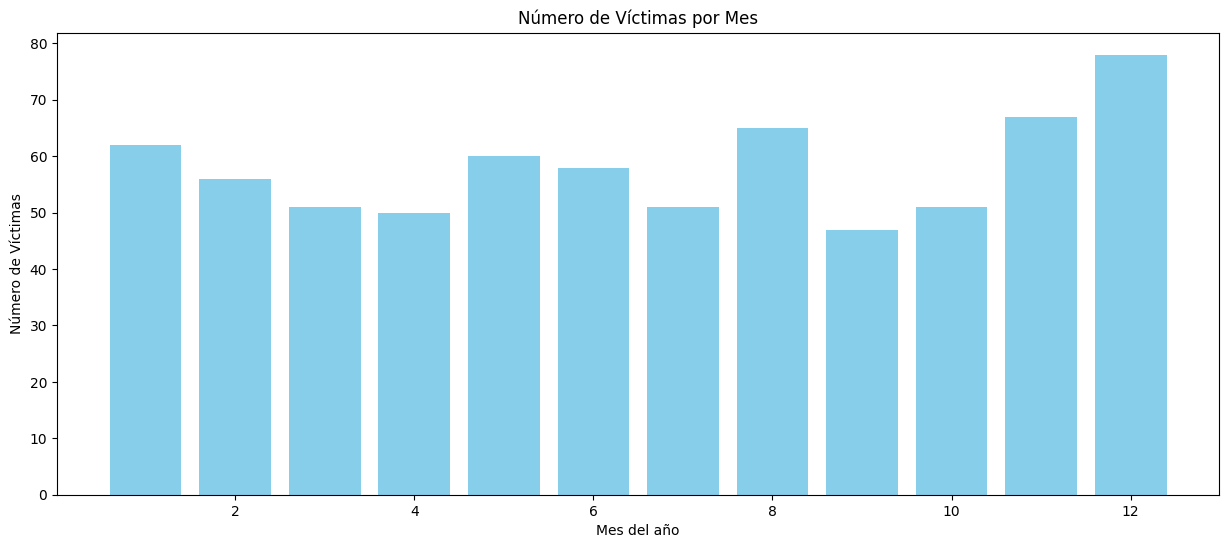

In [185]:
victimas_por_vehiculo = df.groupby('MM')['N_VICTIMAS'].count().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(15, 6))
plt.bar(victimas_por_vehiculo['MM'], victimas_por_vehiculo['N_VICTIMAS'], color='SKyblue')
plt.xlabel('Mes del año')
plt.ylabel('Número de Víctimas')
plt.title('Número de Víctimas por Mes')
plt.show()

Esta gráfica nos indica que la cantidad de victimas comienza a aumentar en el mes 11 y el de mayor cantidad es el 12, probablemente por comienzo de celebraciones decembrinas.

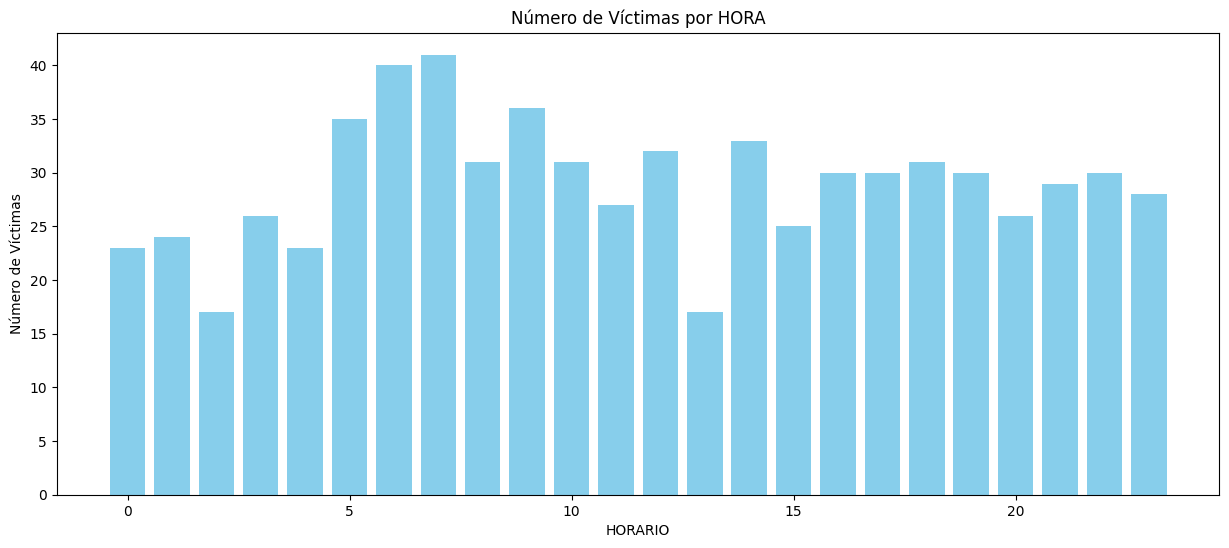

In [188]:
victimas_por_vehiculo = df.groupby('HH')['N_VICTIMAS'].count().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(15, 6))
plt.bar(victimas_por_vehiculo['HH'], victimas_por_vehiculo['N_VICTIMAS'], color='SKyblue')
plt.xlabel('HORARIO')
plt.ylabel('Número de Víctimas')
plt.title('Número de Víctimas por HORA')
plt.show()

Al ver esta gráfica podemos ver que en el acumulado los horarios con mayor cantidad de victimas son las 6, 7 y 9am, con un repounte a las 12 y 2pm.

In [187]:
df = df.loc[df['HH'] != 'SD']

# Imprimir el DataFrame resultante
print(df)

            ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA  HH  \
0    2016-0001           1 2016-01-01  2016   1   1  04:00:00   4   
1    2016-0002           1 2016-01-02  2016   1   2  01:15:00   1   
2    2016-0003           1 2016-01-03  2016   1   3  07:00:00   7   
3    2016-0004           1 2016-01-10  2016   1  10  00:00:00   0   
4    2016-0005           1 2016-01-21  2016   1  21  05:20:00   5   
..         ...         ...        ...   ...  ..  ..       ...  ..   
691  2021-0093           1 2021-12-13  2021  12  13  17:10:00  17   
692  2021-0094           1 2021-12-20  2021  12  20  01:10:00   1   
693  2021-0095           1 2021-12-30  2021  12  30  00:43:00   0   
694  2021-0096           1 2021-12-15  2021  12  15  10:30:00  10   
695  2021-0097           1 2021-11-18  2021  11  18  06:10:00   6   

                               LUGAR_DEL_HECHO TIPO_DE_CALLE  ...  Altura  \
0    AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ       AVENIDA  ...     NaN   
1            AV G

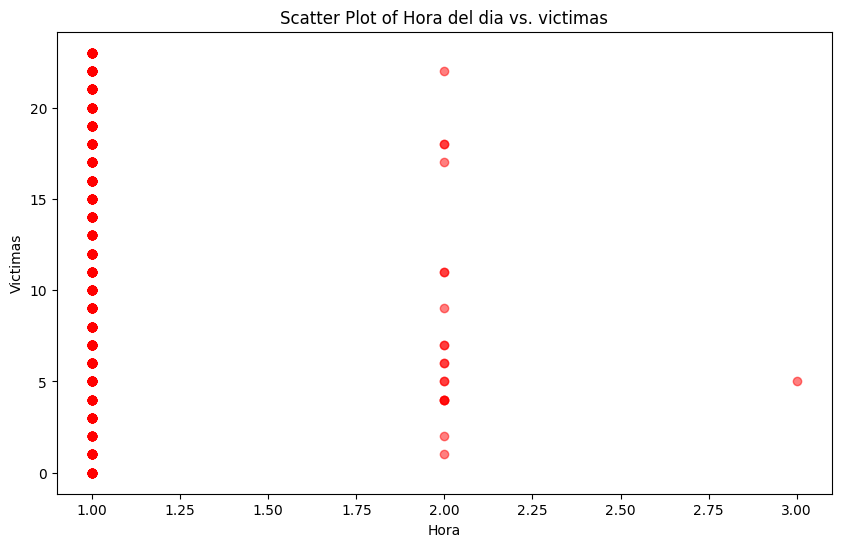

In [189]:
#Scatter Plot
plt.figure(figsize=(10, 6))

plt.scatter(df['N_VICTIMAS'], df['HH'], color='Red', alpha=0.5)

plt.title('Scatter Plot of Hora del dia vs. victimas')
plt.xlabel('Hora')
plt.ylabel('Victimas');

Comenzamos a analizar nuestros datos cualitativos.

Analizamos la cantidad de victimas que tenemos por acusado.

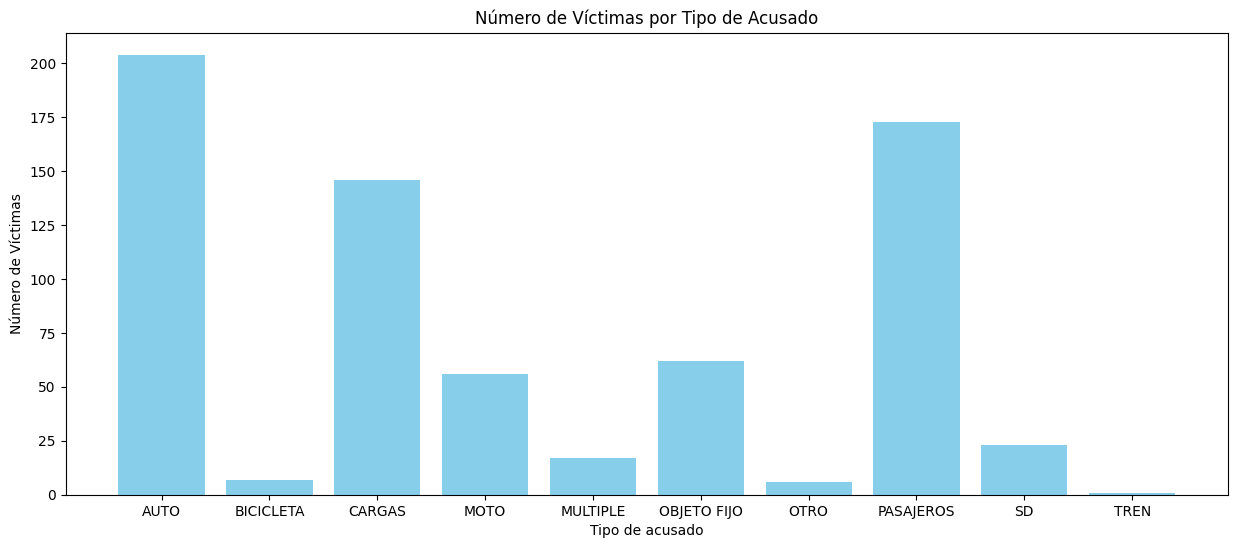

In [190]:
victimas_por_acusado = df.groupby('ACUSADO')['N_VICTIMAS'].count().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(15, 6))
plt.bar(victimas_por_acusado['ACUSADO'], victimas_por_acusado['N_VICTIMAS'], color='SKyblue')
plt.xlabel('Tipo de acusado')
plt.ylabel('Número de Víctimas')
plt.title('Número de Víctimas por Tipo de Acusado')
plt.show()

Podemos notar que el mayor numero de accidentes es causado por autos y personas bajando de un vehiculo, también los vehiculos de carga tienen un gran numero de incidentes.

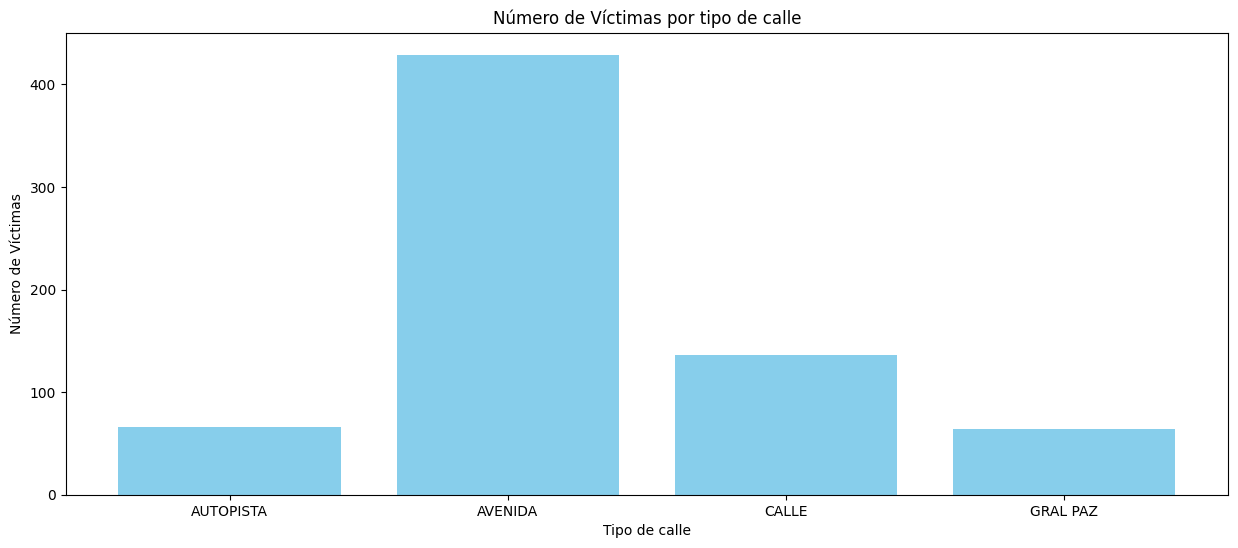

In [191]:
victimas_por_vehiculo = df.groupby('TIPO_DE_CALLE')['N_VICTIMAS'].count().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(15, 6))
plt.bar(victimas_por_vehiculo['TIPO_DE_CALLE'], victimas_por_vehiculo['N_VICTIMAS'], color='SKyblue')
plt.xlabel('Tipo de calle')
plt.ylabel('Número de Víctimas')
plt.title('Número de Víctimas por tipo de calle')
plt.show()

Revisamos en que tipo de calle suceden la mayor cantidad de incidentes, esto podría darnos una guía para considerar los KPI´S.

In [192]:
# Contar la cantidad de calles distintas
cantidad_calles_distintas = df['Calle'].nunique()

# Imprimir el resultado
print(f"La cantidad de calles distintas es: {cantidad_calles_distintas}")

La cantidad de calles distintas es: 279


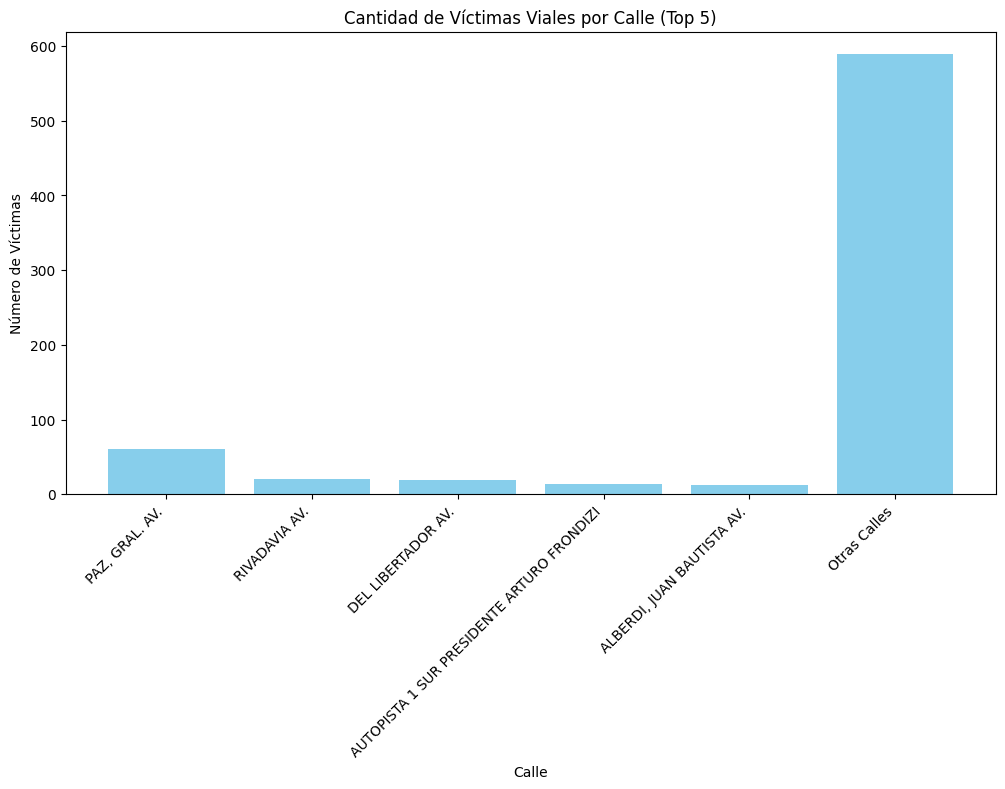

In [193]:
conteo_victimas_por_calle = df.groupby('Calle')['N_VICTIMAS'].sum().reset_index()

# Seleccionar las top N calles con más víctimas
top_n = 5
top_calles = conteo_victimas_por_calle.nlargest(top_n, 'N_VICTIMAS')

# Agrupar las otras calles bajo una categoría general
otras_calles = pd.DataFrame({'Calle': ['Otras Calles'], 'N_VICTIMAS': [conteo_victimas_por_calle['N_VICTIMAS'].sum() - top_calles['N_VICTIMAS'].sum()]})

# Concatenar las calles principales y 'Otras Calles'
df_plot = pd.concat([top_calles, otras_calles])

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_plot['Calle'], df_plot['N_VICTIMAS'], color='skyblue')
plt.xlabel('Calle')
plt.ylabel('Número de Víctimas')
plt.title('Cantidad de Víctimas Viales por Calle (Top 5)')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor legibilidad
plt.show()

Con esta gráfica podremos ver como PAZ, GRAL. AV. es la calle con mayor número de víctimas, la categpría de 'Otras Calles' es la suma de las victimas de las otras 274 calles, lo que hace sentido al ver su diferencia con las demás categorías separadas.

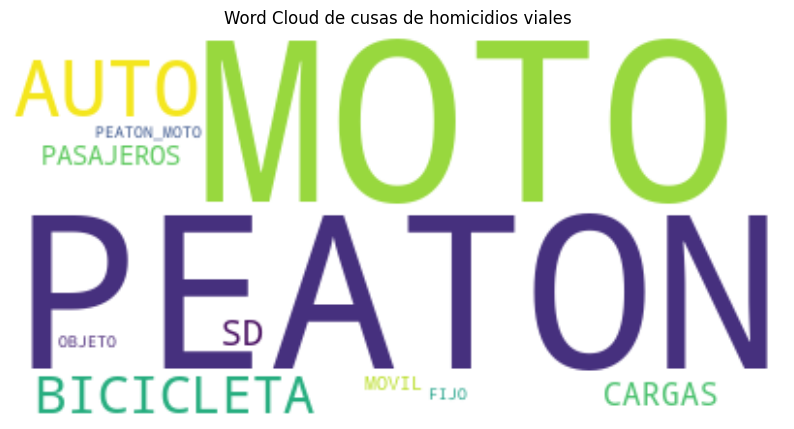

In [195]:


text = ' '.join(df['VICTIMA'])


wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de cusas de homicidios viales')
plt.show()

Podemos notar de manera más visual cuales son las razones más comunes de homicidios viales.


Conclusiones a las que podemos llegar con toda la información presentada puede ser que en años anteriores los accidentes viales eran más frecuentes que los años consecuentes, y que en estos ncontramos un patron de aumento en los últimos meses. A todo esto notando que las motos son las mayores causantes de victimas en estas tablas por mucho.
Con estos podríamos darnos alguna idea de cuales pudieran ser los primeros problemas a tratar.